In [1]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from math import sqrt, pi, e
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

# reading data file
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
#df = df.head(10)

# splitting X and y
X = df.drop(['DEATH_EVENT'], axis=1)
y = df.drop(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure',
             'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'], axis=1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# function for calculating number of zeros and ones in DEATH_EVENT column
# Survived = 0      Deaths = 1
def count_values():
    count_zeros = 0
    count_ones = 0
    for i in y_train["DEATH_EVENT"]:
        if i == 0:
            count_zeros += 1
        else:
            count_ones += 1
    return count_zeros, count_ones


# counting zeros and ones in DEATH_EVENT COLUMN
total_survived, total_deaths = count_values()
# (total_survived,total_deaths)


# function to calculate conditional probabilities of numerical features
def conditional_probabilities_binary(feat_name):
    feat_count_0_survived = 0
    feat_count_0_death = 0
    feat_count_1_survived = 0
    feat_count_1_death = 0
    for i in zip(X_train[feat_name], y_train["DEATH_EVENT"]):
        if i[0] == 0 and i[1] == 0:
            feat_count_0_survived += 1
        elif i[0] == 0 and i[1] == 1:
            feat_count_0_death += 1
        elif i[0] == 1 and i[1] == 0:
            feat_count_1_survived += 1
        elif i[0] == 1 and i[1] == 1:
            feat_count_1_death += 1

    prob_0_survived = feat_count_0_survived / total_survived
    prob_0_death = feat_count_0_death / total_deaths
    prob_1_survived = feat_count_1_survived / total_survived
    prob_1_death = feat_count_1_death / total_deaths
    

    return prob_0_survived, prob_0_death, prob_1_survived, prob_1_death


# calculating conditional probabilities of anaemia feature
anaemia_0_survived, anaemia_0_death, anaemia_1_survived, anaemia_1_death = conditional_probabilities_binary("anaemia")

# calculating conditional probabilities of diabetes feature
diabetes_0_survived, diabetes_0_death, diabetes_1_survived, diabetes_1_death = conditional_probabilities_binary("diabetes")

# calculating conditional probabilities of high blood pressure feature
hbp_0_survived, hbp_0_death, hbp_1_survived, hbp_1_death = conditional_probabilities_binary("high_blood_pressure")

# calculating conditional probabilities of sex feature
male_survived, male_death, female_survived, female_death = conditional_probabilities_binary("sex")

# calculating conditional probabilities of smoking feature
non_smoker_survived, non_smoker_death, smoker_survived, smoker_death = conditional_probabilities_binary("smoking")


# function to calculate mean and standard deviation for numerical features
def calculating_mean_std(feat_name):
    values_for_survived = []
    values_for_death = []
    for i in zip(X_train[feat_name], y_train["DEATH_EVENT"]):
        if i[1] == 0:
            values_for_survived.append(i[0])
        elif i[1] == 1:
            values_for_death.append(i[0])

    # calculating means
    mean_survived = mean(values_for_survived)
    mean_death = mean(values_for_death)

    # calculating standard deviation
    std_survived = stdev(values_for_survived)
    std_death = stdev(values_for_death)

    return mean_survived, mean_death, std_survived, std_death


# function to calculate conditional probabilities of numerical features
def conditional_probabilities_numerical(avg, std, val):
    prob = (1 / (sqrt(2 * pi)) * std) * e ** (-1 * ((val - avg) ** 2) / 2 * (std ** 2))
    return prob


# calculating mean and standard deviation of age feature
age_mean_survived, age_mean_death, age_std_survived, age_std_death = calculating_mean_std("age")

# calculating mean and standard deviation of creatinine phosphokinase feature
cp_mean_survived, cp_mean_death, cp_std_survived, cp_std_death = calculating_mean_std("creatinine_phosphokinase")

# calculating mean and standard deviation of ejection fraction feature
ef_mean_survived, ef_mean_death, ef_std_survived, ef_std_death = calculating_mean_std("ejection_fraction")

# calculating mean and standard deviation of platelets feature
platelets_mean_survived, platelets_mean_death, platelets_std_survived, platelets_std_death = calculating_mean_std("platelets")

# calculating mean and standard deviation of serum creatinine feature
sc_mean_survived, sc_mean_death, sc_std_survived, sc_std_death = calculating_mean_std("serum_creatinine")

# calculating mean and standard deviation of serum sodium feature
ss_mean_survived, ss_mean_death, ss_std_survived, ss_std_death = calculating_mean_std("serum_sodium")

# calculating mean and standard deviation of time feature
time_mean_survived, time_mean_death, time_std_survived, time_std_death = calculating_mean_std("time")

# list to store all the predicted labels
y_preds = []


def classifier():
    # reading test values for prediction
    for i in range(0, len(X_test)):
        age = X_test.iloc[i, 0]
        anaemia = X_test.iloc[i, 1]
        cp = X_test.iloc[i, 2]
        diabetes = X_test.iloc[i, 3]
        ef = X_test.iloc[i, 4]
        hbp = X_test.iloc[i, 5]
        platelets = X_test.iloc[i, 6]
        sc = X_test.iloc[i, 7]
        ss = X_test.iloc[i, 8]
        sex = X_test.iloc[i, 9]
        smoking = X_test.iloc[i, 10]
        time = X_test.iloc[i, 11]

        # getting probabilities of binary features based on their value
        if anaemia == 0:
            anaemia_for_survived = anaemia_0_survived
            anaemia_for_death = anaemia_0_death
        else:
            anaemia_for_survived = anaemia_1_survived
            anaemia_for_death = anaemia_1_death

        if diabetes == 0:
            diabetes_for_survived = diabetes_0_survived
            diabetes_for_death = diabetes_1_death
        else:
            diabetes_for_survived = diabetes_1_survived
            diabetes_for_death = diabetes_1_death

        if hbp == 0:
            hbp_for_survived = hbp_0_survived
            hbp_for_death = hbp_0_death
        else:
            hbp_for_survived = hbp_1_survived
            hbp_for_death = hbp_1_death

        if sex == 0:
            sex_for_survived = male_survived
            sex_for_death = male_death
        else:
            sex_for_survived = female_survived
            sex_for_death = female_death

        if smoking == 0:
            smoking_for_survived = non_smoker_survived
            smoking_for_death = non_smoker_death
        else:
            smoking_for_survived = smoker_survived
            smoking_for_death = smoker_death
        

        # calculating conditional probabilities of numerical features
        age_for_survived = conditional_probabilities_numerical(age_mean_survived, age_std_survived, age)
        age_for_death = conditional_probabilities_numerical(age_mean_death, age_std_death, age)
        #print(age_for_survived,age_for_death,"\n")

        cp_for_survived = conditional_probabilities_numerical(cp_mean_survived, cp_std_survived, cp)
        cp_for_death = conditional_probabilities_numerical(cp_mean_death, cp_std_death, cp)
        #print(cp_for_survived,cp_for_death,"\n")

        ef_for_survived = conditional_probabilities_numerical(ef_mean_survived, ef_std_survived, ef)
        ef_for_death = conditional_probabilities_numerical(ef_mean_death, ef_std_death, ef)
        #print(ef_for_survived,ef_for_death,"\n")

        platelets_for_survived = conditional_probabilities_numerical(platelets_mean_survived, platelets_std_survived,platelets)
        platelets_for_death = conditional_probabilities_numerical(platelets_mean_death, platelets_std_death, platelets)
        #print(platelets_for_survived,platelets_for_death,"\n")

        sc_for_survived = conditional_probabilities_numerical(sc_mean_survived, sc_std_survived, sc)
        sc_for_death = conditional_probabilities_numerical(sc_mean_death, sc_std_death, sc)
        #print(sc_for_survived,sc_for_death,"\n")

        ss_for_survived = conditional_probabilities_numerical(ss_mean_survived, ss_std_survived, ss)
        ss_for_death = conditional_probabilities_numerical(ss_mean_death, ss_std_death, ss)
        #print(ss_for_survived,ss_for_death,"\n")

        time_for_survived = conditional_probabilities_numerical(time_mean_survived, time_std_survived, time)
        time_for_death = conditional_probabilities_numerical(time_mean_death, time_std_death, time)
        #print(time_for_survived,time_for_death,"\n")
        #print("###################################")

        if (age_for_survived or age_for_death or cp_for_survived or cp_for_death or ef_for_survived or ef_for_death or
            platelets_for_survived or platelets_for_death or sc_for_survived or sc_for_death or ss_for_survived or 
            ss_for_death or time_for_survived or time_for_death == 0.0
            ):
          age_for_survived += (1/12)
          age_for_death += (1/12)
          cp_for_survived += (1/12)
          cp_for_death += (1/12)
          ef_for_survived += (1/12)
          ef_for_death +=(1/12)
          platelets_for_survived +=(1/12)
          platelets_for_death +=(1/12)
          sc_for_survived +=(1/12)
          sc_for_death +=(1/12)
          ss_for_survived +=(1/12)
          ss_for_death +=(1/12)
          time_for_survived +=(1/12)
          time_for_death +=(1/12)

        likelihood_survived = age_for_survived * anaemia_for_survived * cp_for_survived * diabetes_for_survived * \
                              ef_for_survived * hbp_for_survived * platelets_for_survived * sc_for_survived * \
                              ss_for_survived * sex_for_survived * smoking_for_survived * time_for_survived

        likelihood_death = age_for_death * anaemia_for_death * cp_for_death * diabetes_for_death * ef_for_death *\
                           hbp_for_death * platelets_for_death * sc_for_death * ss_for_death * sex_for_death *\
                           smoking_for_death * time_for_death

        probability_survived = likelihood_survived / likelihood_survived + likelihood_death
        #probability_survived = likelihood_survived
        probability_death = likelihood_death / likelihood_survived + likelihood_death
        #probability_death = likelihood_death

        #print(probability_survived,probability_death)

        if probability_survived > probability_death:
            label = 0
        else:
            label = 1

        y_preds.append(label)


classifier()
print(y_preds)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [2]:
# calculating precision, recall, and f1score

precision_recall_fscore_support(y_test, y_preds)

(array([0.64864865, 0.52173913]),
 array([0.68571429, 0.48      ]),
 array([0.66666667, 0.5       ]),
 array([35, 25]))

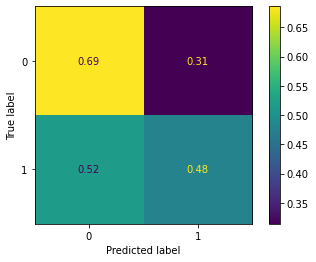

In [3]:
# Plotting confusion matrix

cm = confusion_matrix(y_test, y_preds, normalize = 'true')
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot()